# Проект: Исследование стартапов

## Введение

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов.

Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.

Данные неполны, поэтому заказчик, кроме ответа на некоторые интересующие его вопросы, просит аккуратно относиться к получаемым в процессе исследования значениям показателей и выводам и стараться оценивать их на возможные искажения.

**Цель проекта**

Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* people.csv
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов


* Загрузите все данные по проекту.

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as  sns

In [2]:
# загрузка данных из файлов
acquisition = pd.read_csv('https://code.s3.yandex.net//datasets/acquisition.csv')
company_and_rounds = pd.read_csv('https://code.s3.yandex.net//datasets/company_and_rounds.csv')
degrees = pd.read_csv('https://code.s3.yandex.net//datasets/degrees.csv')
education = pd.read_csv('https://code.s3.yandex.net//datasets/education.csv')
people = pd.read_csv('https://code.s3.yandex.net//datasets/people.csv')
fund = pd.read_csv('https://code.s3.yandex.net//datasets/fund.csv')
investment = pd.read_csv('https://code.s3.yandex.net//datasets/investment.csv')


* Проверьте названия столбцов.

In [3]:
# выводим названия столбцов датафрейма acquisition
acquisition.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [4]:
# переименуем столбец id  датафрейма acquisition   в более понятное название
# чтобы можно было отличить его от аналогичных столбцов других датафреймов
acquisition = acquisition.rename(columns = {'id': 'acq_id'})

In [5]:
# выводим информацию о датафрейме acquisition
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   acq_id                9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [6]:
# выводим долю пропусков в столбцах датафрейма acquisition
acquisition.isna().sum()/len(acquisition)

acq_id                  0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

In [7]:
# выведем уникальные значения столбца term_code
acquisition['term_code'].unique()

array([nan, 'cash', 'stock', 'cash_and_stock'], dtype=object)

In [8]:
acquisition.head()

,acq_id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [9]:
# Проверка наличия явных дубликатов датафрейма acquisition
acquisition.duplicated().sum()

0

заполнить пропуски в столбце term_code не получится

In [10]:
# выводим названия столбцов датафрейма company_and_rounds
company_and_rounds.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [11]:
# При приведении написания названий столбцов в snake_case, столбцы 'company  ID' 'company  id' получат одинаковые названия.
# важно не допустить этого, поэтому переименуем их заранее
company_and_rounds = company_and_rounds.rename(columns = {'company  ID' :  'company_id',
                                'company  id': 'company_id_r' })

In [12]:
# заменим пробелы на _ в названиях столбцов датафрейма company_and_rounds
# названия приведем к нижнему регистру
company_and_rounds.columns = company_and_rounds.columns.str.replace('  ','_').str.lower()

In [13]:
# проверим названия столбцов после изменений
company_and_rounds.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_r', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [14]:
# выведем информацию о  датафреймеcompany_and_rounds
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id_r         52928 non-null   float64
 15  funded_at        

In [15]:
# выведем долю пропусков в столбцах датафрейма company_and_rounds
company_and_rounds.isna().sum()/len(company_and_rounds)

company_id             0.001387
name                   0.001387
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
company_id_r           0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
dtype: float64

In [16]:
company_and_rounds.isna().mean()

company_id             0.001387
name                   0.001387
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
company_id_r           0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
dtype: float64

In [17]:
# Выведем первые строки company_and_rounds
company_and_rounds.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id_r,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Проверка наличия явных дубликатов датафрейма company_and_rounds
company_and_rounds.duplicated().sum()

0

In [19]:
# выводим названия столбцов датафрейма people
people.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

In [20]:
# переименуем столбец id  датафрейма people   в более понятное название
# чтобы можно было отличить его от аналогичных столбцов других датафреймов
people = people.rename(columns = {'id' : 'people_id'})

In [21]:
# выведем информацию о  датафрейме people
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   people_id         226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [22]:
# выведем долю пропусков в столбцах датафрейма people
people.isna().sum()/len(people)

people_id           0.000000
first_name          0.000022
last_name           0.000004
company_id          0.847315
network_username    0.828560
dtype: float64

In [23]:
# Выведем первые строки people
people.head()

,people_id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [24]:
# Проверка наличия явных дубликатов датафрейма people
people.duplicated().sum()

0

In [25]:
# выводим названия столбцов датафрейма education
education.columns

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

In [26]:
# переименуем столбец id  датафрейма education   в более понятное название
# чтобы можно было отличить его от аналогичных столбцов других датафреймов
education = education.rename(columns  = {'id' : 'edu_id'})

In [27]:
# выводим названия столбцов датафрейма education
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   edu_id        109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [28]:
# выведем долю пропусков в столбцах датафрейма education
education.isna().sum()/len(education)

edu_id          0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

In [29]:
# Выведем первые строки education
education.head()

,edu_id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [30]:
# Проверка наличия явных дубликатов датафрейма education
education.duplicated().sum()

0

In [31]:
# выводим названия столбцов датафрейма degrees
degrees.columns

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

In [32]:
# переименуем столбец id  датафрейма degrees   в более понятное название
# чтобы можно было отличить его от аналогичных столбцов других датафреймов
degrees = degrees.rename(columns  = {'id' : 'degr_id'})

In [33]:
# выведем информацию о  датафрейме degrees
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   degr_id      109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [34]:
# выведем долю пропусков в столбцах датафрейма degrees
degrees.isna().sum()/len(degrees)

degr_id        0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64

In [35]:
# Выведем первые строки degrees
degrees.head()

,degr_id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [36]:
# Проверка наличия явных дубликатов датафрейма degrees
degrees.duplicated().sum()

0


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

Таблица **acquisition** содержит информацию о покупках одних компаний другими компаниями.  Всего 9407 строк, высокая доля пропусков (80%) в столбце term_code, в котором представлена информация о вариантах расчета.

Таблица **company_and_rounds**  содержит информацию о компаниях и раундах финансирования.  Вероятно, была получена объединением 2 таблиц, в которых отдельно хранилась информация о компаниях и раундах финансирования. В части, которая предположительно относилась к раундам финансирования, пропущены 75% значений во всех столбцах.  В части, которая предположительно относилась к компаниям, доля пропусков варьируется от 0.1% до 98%.

Таблица **people** содержит информацию о сотрудниках компаний. Значительное количество пропусков в столбцах company_id – идентификатор компании и network_username – ник в сети, 84% и 82% процента соответственно.

Таблица **education** содержит информацию об образовании сотрудников. 47% значений пропущено в столбце с датой получения образования (окочнания обучения в учебном заведении.)

Таблица **degrees** содержит информацию о типе образования сотрудника. Пропущены 10% значений столбца с данными о типе образования и 25%  значений столбца, хранящего данные о специальности.
 


### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

In [37]:
acquisition.head()

,acq_id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [38]:
# изменим тип данных в столбце acquired_at датафрейма acquisition 
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'])

In [39]:
acquisition.dtypes

acq_id                           int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

Изменим типы данных в столбцах founded_at, closed_at, funded_at датафрейма company_and_rounds на datetime

In [40]:
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'])

In [41]:
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'])

In [42]:
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'])

In [43]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_


* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [44]:
# изменим тип данных в столбце graduated_at датафрейма education 
education['graduated_at'] = pd.to_datetime(education['graduated_at'])

In [45]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   edu_id        109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


Не все данные были представлены в нужном формате.
Так, некоторые данные, отражающие дату определенных событий, были представлены типом object.  
Для данных, содержащих информацию о дате и времени, изменили тип данных на datetime: 
- таблица acquisition столбец  acquired_at
- таблица company_and_rounds столбцы founded_at, closed_at, funded_at
- таблица education столбец graduated_at


Таблица company_and_rounds, вероятно была сформирована из двух ранее отдельных таблиц, поэтому в столбцах ее второй части пропущены 76% значений. 

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [46]:
# выводим информацию о датафрейме company_and_rounds
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [47]:
# выделим год из даты финансирования funded_at
company_and_rounds['fund_year'] = company_and_rounds['funded_at'].dt.year

In [48]:
company_and_rounds.head(10)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_r,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,fund_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
pivot = company_and_rounds.pivot_table(
    values  =['raised_amount', 'investment_rounds'],   
    index = 'fund_year', 
    aggfunc = {'raised_amount':'median',
               'investment_rounds':'sum'})
display(pivot)

,investment_rounds,raised_amount
fund_year,,
1960.0,1.0,0.0
1973.0,0.0,0.0
1974.0,0.0,0.0
1984.0,0.0,41000.0
1985.0,0.0,0.0
1987.0,89.0,1250000.0
1989.0,1.0,15000.0
1990.0,0.0,1000000.0
1992.0,0.0,2000000.0


In [50]:
# исправление сводной таблицы
pivot = company_and_rounds.pivot_table(
    values  =['raised_amount', 'investment_rounds'],   
    index = 'fund_year', 
    aggfunc = {'raised_amount':'median',
               'investment_rounds':'count'})
display(pivot)

,investment_rounds,raised_amount
fund_year,,
1960.0,9,0.0
1973.0,1,0.0
1974.0,2,0.0
1984.0,3,41000.0
1985.0,1,0.0
1987.0,2,1250000.0
1989.0,1,15000.0
1990.0,1,1000000.0
1992.0,1,2000000.0


In [51]:

# исправление сводной таблицы --------------  новая версия2 
what = company_and_rounds.pivot_table(
    values  =['raised_amount', 'investment_rounds'],   
    index = 'fund_year', 
    aggfunc = {'raised_amount':'count',
               'investment_rounds':'count'})
what = what.rename(columns = {what.columns[0]: 'investment_rounds1',
                              what.columns[1]: 'raised_amount_count'})

display(what)


,investment_rounds1,raised_amount_count
fund_year,,
1960.0,9,9
1973.0,1,1
1974.0,2,2
1984.0,3,3
1985.0,1,1
1987.0,2,2
1989.0,1,1
1990.0,1,1
1992.0,1,1


In [52]:
what2 = company_and_rounds.pivot_table(
    values  =['raised_amount', 'investment_rounds'],   
    index = 'fund_year', 
    aggfunc = {'raised_amount':'median',
               'investment_rounds':'count'})
what2 = what2.rename(columns={what2.columns[0]: 'investment_rounds2',
                              what2.columns[1]: 'raised_amount_median'})
display(what2)

,investment_rounds2,raised_amount_median
fund_year,,
1960.0,9,0.0
1973.0,1,0.0
1974.0,2,0.0
1984.0,3,41000.0
1985.0,1,0.0
1987.0,2,1250000.0
1989.0,1,15000.0
1990.0,1,1000000.0
1992.0,1,2000000.0


Создал 2 сводные таблицы: 
what1 - с кол-вом раундов инвестироваиня и кол-вом raised_amount для каждого года
what2 - с кол-вом раундов инвестироваиня и медианой raised_amount для каждого года

In [53]:
# Объединим таблицы what1 и  what2
what3 = what.merge(what2, how = 'inner' , on = 'fund_year' )

display(what3)

,investment_rounds1,raised_amount_count,investment_rounds2,raised_amount_median
fund_year,,,,
1960.0,9,9,9,0.0
1973.0,1,1,1,0.0
1974.0,2,2,2,0.0
1984.0,3,3,3,41000.0
1985.0,1,1,1,0.0
1987.0,2,2,2,1250000.0
1989.0,1,1,1,15000.0
1990.0,1,1,1,1000000.0
1992.0,1,1,1,2000000.0


In [54]:
# Отфильтруем, выберем только те года, в которых было больше 50 рауднов инвестирования. 
what4 =  what3[(what3['investment_rounds1'])> 50]
display(what4)

,investment_rounds1,raised_amount_count,investment_rounds2,raised_amount_median
fund_year,,,,
1999.0,76,76,76,2000000.0
2000.0,125,125,125,4200000.0
2001.0,95,96,95,3000000.0
2002.0,115,116,115,4200000.0
2003.0,154,159,154,3000000.0
2004.0,286,291,286,5000000.0
2005.0,1624,1633,1624,5500000.0
2006.0,2409,2436,2409,5000000.0
2007.0,3220,3279,3220,3973320.0


In [55]:
# сбросим индексы для построения графиков
what4 = what4.reset_index()
display(what4)

,fund_year,investment_rounds1,raised_amount_count,investment_rounds2,raised_amount_median
0,1999.0,76,76,76,2000000.0
1,2000.0,125,125,125,4200000.0
2,2001.0,95,96,95,3000000.0
3,2002.0,115,116,115,4200000.0
4,2003.0,154,159,154,3000000.0
5,2004.0,286,291,286,5000000.0
6,2005.0,1624,1633,1624,5500000.0
7,2006.0,2409,2436,2409,5000000.0
8,2007.0,3220,3279,3220,3973320.0
9,2008.0,3735,3774,3735,3110000.0


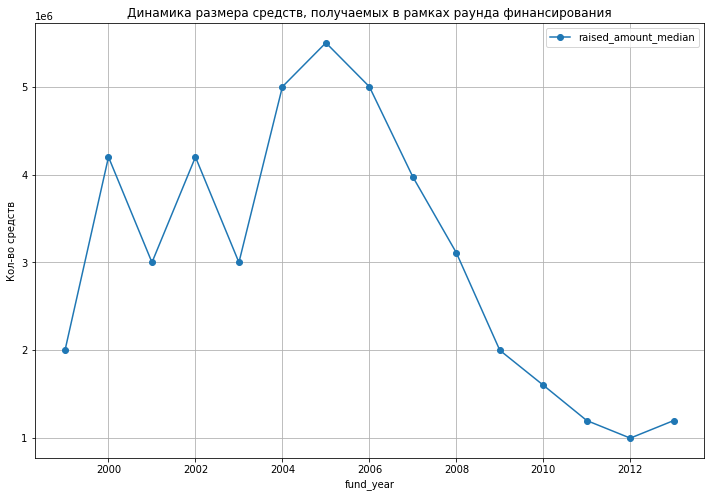

In [56]:
# строим график динамики средств, получаемых в рамках раунда финансирования
what4.plot(
    kind= 'line',
    x='fund_year',
    y='raised_amount_median',
    marker = 'o',
    figsize=(12,8)
)
plt.grid()
plt.title('Динамика размера средств, получаемых в рамках раунда финансирования')
plt.ylabel('Кол-во средств')
plt.show()

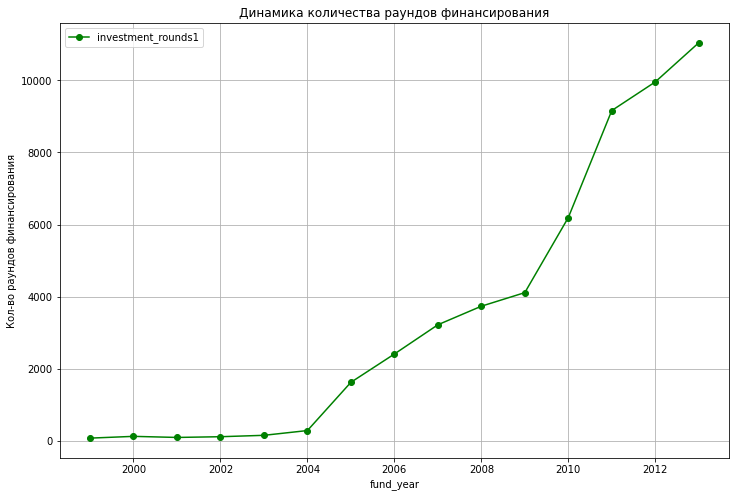

In [57]:
# Построим график, отображающий количествво раундов финансирования в зависимости от года.
what4.plot(
    kind= 'line',
    x='fund_year',
    y='investment_rounds1',
    marker = 'o',
    figsize=(12,8),
    color = 'green'
)
plt.grid()
plt.title('Динамика количества раундов финансирования')
plt.ylabel('Кол-во раундов финансирования')
plt.show()

In [58]:
#  Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
filtered_pivot =  pivot[(pivot['investment_rounds'])> 50]
display(filtered_pivot)

,investment_rounds,raised_amount
fund_year,,
1999.0,76,2000000.0
2000.0,125,4200000.0
2001.0,95,3000000.0
2002.0,115,4200000.0
2003.0,154,3000000.0
2004.0,286,5000000.0
2005.0,1624,5500000.0
2006.0,2409,5000000.0
2007.0,3220,3973320.0


In [59]:
# сбросим индексы получившейся таблицы, чтобы построить график
filtered_pivot2 = filtered_pivot.reset_index()

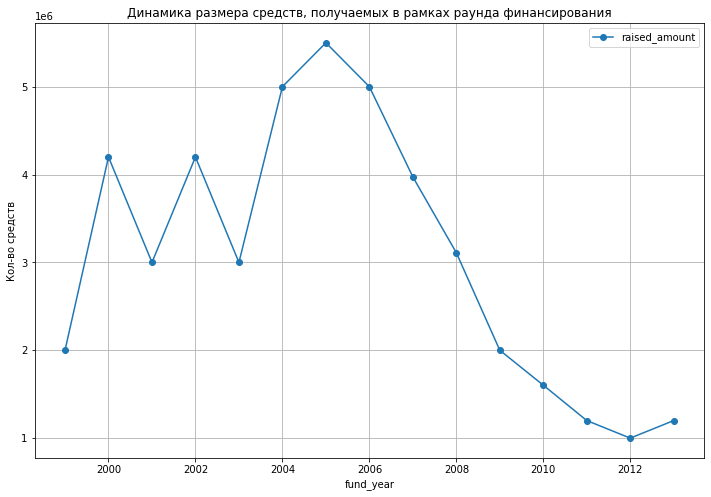

In [60]:
# строим график динамики средств, получаемых в рамках раунда финансирования
filtered_pivot2.plot(
                    kind= 'line',
    x='fund_year',
    y='raised_amount',
    marker = 'o',
    figsize=(12,8)
)
plt.grid()
plt.title('Динамика размера средств, получаемых в рамках раунда финансирования')
plt.ylabel('Кол-во средств')
plt.show()

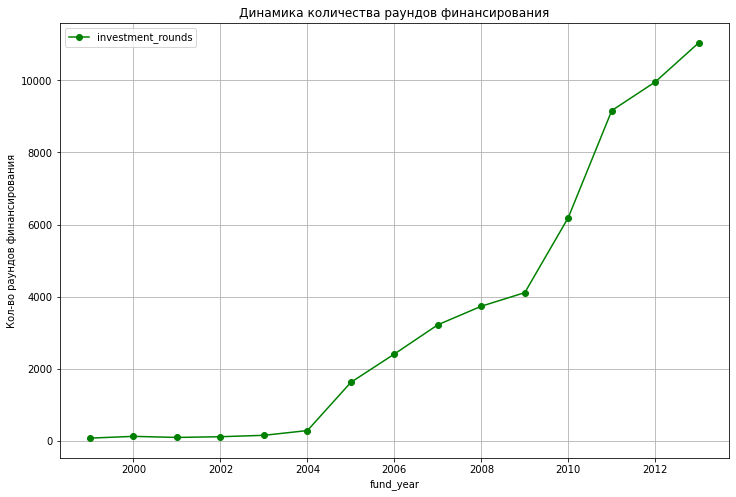

In [61]:
# Построим график, отображающий количествво раундов финансирования в зависимости от года.
filtered_pivot2.plot(
    kind= 'line',
    x='fund_year',
    y='investment_rounds',
    marker = 'o',
    figsize=(12,8),
    color = 'green'
)
plt.grid()
plt.title('Динамика количества раундов финансирования')
plt.ylabel('Кол-во раундов финансирования')
plt.show()

Максимальный типичный размер собранных средств в рамках раунда финансирования зафиксирован в 2007 году  - 3973320.
С 2007 по 2012 год наблюдалось снижение объемов финансирования стартапов, в 2012 году достигнуто наименьшее значение объема финансирования. 2013 год стал моментом изменения тренда - в 2013 объем финансирования превысил значение 2012 года. Аналогичная ситуация с количестовом раундов финансирования - рост числа раундов после снижения в 2012 году.

Максимальный типичный размер собранных средств в рамках раунда финансирования зафиксирован в 2005 году - 5,5 млн. С 2005 по 2012 год наблюдалось снижение объемов финансирования стартапов, в 2012 году достигнуто наименьшее значение объема финансирования 1 млн. 2013 год стал моментом изменения тренда - в 2013 объем финансирования превысил значение 2012 года. Также очевиден тренд роста количества раундов финансирования от года к году. Единственное исключение  -  2001 год, в котором было меньше раундов, чем в предыдущем 2000 году.

Можно сказать, что наблюдаем 2 разнонаправленных тренда:
рост числа раундов финансирования  в рамках года и снижение объемов финансирования.    
Вероятно, падает уверенность и оптимизм
инвесторов, поэтому они готовы рисковать меньшими объемами средств, чем ранее.
То есть растет количество раундов финансирования,
но объем средств, выделяемых в рамках раунда, снижается


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [62]:
# информация о датафрейме people
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   people_id         226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [63]:
# первые строки датафрейма people
people.head()

,people_id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [64]:
# информация о датафрейме education
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   edu_id        109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [65]:
# первые строки датафрейма education
education.head()

,edu_id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT


Видим, что датафрейм education почти в 2 раза меньше датафрейма people.

In [66]:
# оценим долю пропущенных значений в датафрейме education
education.isna().sum()/len(education)

edu_id          0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

В датафрейме education у 47% нет информации об окончании обучения

In [67]:
# информация о датафрейме degrees
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   degr_id      109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [68]:
# первые строки датафрейма degrees
degrees.head()

,degr_id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [69]:
# из всех значений столбца object_id  датафрейма degrees уберем первыые 2 символа
# это необходимо для объединения датафреймов
degrees['object_id'] = degrees['object_id'].str.slice(2)

In [70]:
# Заменим тип данный в столбце object_id  датафрейма degrees на float64 
degrees['object_id'] = degrees['object_id'].astype('float64')

In [71]:
# объединим датафреймы people и education
peopedu = people.merge(education, how= 'left' , left_on  = 'people_id' , right_on ='person_id' )

In [72]:
# К датафрейму peopedu добавим датафрейм degrees
peopedudeg = peopedu.merge(degrees, how = 'left', left_on = 'people_id' , right_on = 'object_id')

In [73]:
# информация о датафрейме peopedudeg
peopedudeg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370836 entries, 0 to 370835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   people_id         370836 non-null  int64         
 1   first_name        370831 non-null  object        
 2   last_name         370835 non-null  object        
 3   company_id        70869 non-null   float64       
 4   network_username  81529 non-null   object        
 5   edu_id            212198 non-null  float64       
 6   person_id         212198 non-null  float64       
 7   instituition      212109 non-null  object        
 8   graduated_at      113991 non-null  datetime64[ns]
 9   degr_id           212198 non-null  float64       
 10  object_id         212198 non-null  float64       
 11  degree_type       190722 non-null  object        
 12  subject           156477 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memor

In [74]:
# первые строки датафрейма peopedudeg
peopedudeg.head()

,people_id,first_name,last_name,company_id,network_username,edu_id,person_id,instituition,graduated_at,degr_id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,2415.0,10.0,NaN,Computer Science
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [75]:
# оценим процент пропусков в объединенном датафрейме 
peopedudeg.isna().sum()/len(peopedudeg)

people_id           0.000000
first_name          0.000013
last_name           0.000003
company_id          0.808894
network_username    0.780148
edu_id              0.427785
person_id           0.427785
instituition        0.428025
graduated_at        0.692611
degr_id             0.427785
object_id           0.427785
degree_type         0.485697
subject             0.578043
dtype: float64

In [76]:
# количество дубликатов по столбцу people_id
peopedudeg['people_id'].duplicated().sum()

144128

In [77]:
# удалим дубликаты из столбца people_id объединенного датафрейма
peopedudeg = peopedudeg.drop_duplicates(subset = ['people_id'] , keep='first', inplace=False)

In [78]:
peopedudeg.head()

,people_id,first_name,last_name,company_id,network_username,edu_id,person_id,instituition,graduated_at,degr_id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,2415.0,10.0,NaN,Computer Science
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


Данные, которые позволят понять, есть ли образование у сотрудника, хранятся в столбцах
**instituition, graduated_at,  degree_type, subject**. Наличие данных  хотя бы в 1 из этих столбцов свидетельствует о наличии образования у сотрудника.

In [79]:
# для удобства дальнейшего анализа заменим пропуски в столбцах 
# instituition, graduated_at,  degree_type, subject, company_id значениями - заглушками (-1)
peopedudeg['instituition'] = peopedudeg['instituition'].fillna(-1)
peopedudeg['graduated_at'] = peopedudeg['graduated_at'].fillna(-1)
peopedudeg['degree_type'] = peopedudeg['degree_type'].fillna(-1)
peopedudeg['subject'] = peopedudeg['subject'].fillna(-1)
peopedudeg['company_id'] = peopedudeg['company_id'].fillna(-1)

In [80]:
# в столбце company_id 84% значений пропущены
len(peopedudeg.loc[(peopedudeg['company_id'] == -1)])/len(peopedudeg)

0.8473190182966636

In [81]:
# проверим замену значений
peopedudeg.head(10)

,people_id,first_name,last_name,company_id,network_username,edu_id,person_id,instituition,graduated_at,degr_id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,-1,2415.0,10.0,-1,Computer Science
1,100,Peter,Lester,27.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1
4,100000,Sue,Pilsch,-1.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1
5,100002,Keith,Kurzendoerfer,-1.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1
6,100006,Courtney,Homer,81558.0,jobsbostontech,83604.0,100006.0,MIT Sloan School of Management,2004-01-01 00:00:00,83604.0,100006.0,MBA,Strategy & Marketing
7,100009,Eddy,Badrina,-1.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1
8,100010,Michael,Dadashyan,-1.0,fbroulette,NaN,NaN,-1,-1,NaN,NaN,-1,-1
9,100011,Jeff,Grell,-1.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1


In [82]:
# создаем столбец is_educated , который возвращает 
# значение true, если есть данные хотя бы в 1 из упомянутых выше столбцов
# false, если данных нет ни в 1 столбце.
# если получено значение true - образование есть.
peopedudeg['is_educated'] = (
    (peopedudeg['instituition'] != -1)
    | (peopedudeg['graduated_at'] != -1)
    | (peopedudeg['degree_type'] != -1)
    | (peopedudeg['subject'] != -1))

In [83]:
# проверим стобец is_educated
peopedudeg.head(20)

,people_id,first_name,last_name,company_id,network_username,edu_id,person_id,instituition,graduated_at,degr_id,object_id,degree_type,subject,is_educated
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,-1,2415.0,10.0,-1,Computer Science,True
1,100,Peter,Lester,27.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1,False
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1,False
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1,False
4,100000,Sue,Pilsch,-1.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1,False
5,100002,Keith,Kurzendoerfer,-1.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1,False
6,100006,Courtney,Homer,81558.0,jobsbostontech,83604.0,100006.0,MIT Sloan School of Management,2004-01-01 00:00:00,83604.0,100006.0,MBA,Strategy & Marketing,True
7,100009,Eddy,Badrina,-1.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1,False
8,100010,Michael,Dadashyan,-1.0,fbroulette,NaN,NaN,-1,-1,NaN,NaN,-1,-1,False
9,100011,Jeff,Grell,-1.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1,False


In [84]:
peopedudeg['estedu']= peopedudeg['edu_id'].notna()


In [85]:
peopedudeg['chelovek']= peopedudeg['people_id'].notna()

In [86]:
display(peopedudeg)

,people_id,first_name,last_name,company_id,network_username,edu_id,person_id,instituition,graduated_at,degr_id,object_id,degree_type,subject,is_educated,estedu,chelovek
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,-1,2415.0,10.0,-1,Computer Science,True,True,True
1,100,Peter,Lester,27.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1,False,False,True
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1,False,False,True
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1,False,False,True
4,100000,Sue,Pilsch,-1.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370831,99999,Ramon,Peypoch,-1.0,NaN,NaN,NaN,-1,-1,NaN,NaN,-1,-1,False,False,True
370832,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01 00:00:00,25958.0,174088.0,M.B.B.S.,Medicine,True,True,True
370833,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01 00:00:00,18871.0,118386.0,PhD,Journalism,True,True,True
370834,175827,mahesh,kumar,-1.0,socialnethubs,NaN,NaN,-1,-1,NaN,NaN,-1,-1,False,False,True


In [87]:
# создадим отдельную таблицу, где соберем данные о кол-ве сотрудников к компаниях
chunk = peopedudeg.groupby('company_id')['is_educated'].agg(['count', 'sum']).sort_values(ascending = False, by = 'count')

In [88]:
# делим компании на категории в зависимости от кол-ва сотрудников - добавим столбец compsize - company size
chunk['compsize']= pd.cut(chunk['count'],
    bins = [ 1,2,3,6,11,21,51,101,400],
       labels = [ '1', '2','3-5','6-10 ','11-20','21-50','51-100','100+',]
)

Сount - число всех сотрудников компании, \
sum - число сотрудников, для которых есть данные об образовании

In [89]:
# отобразим таблицу chunk
display(chunk)

,count,sum,compsize
company_id,,,
-1.0,192094,49605,NaN
59.0,244,168,100+
29.0,150,110,100+
1242.0,138,101,100+
231067.0,72,58,51-100
...,...,...,...
56522.0,1,1,NaN
56520.0,1,0,NaN
56501.0,1,1,NaN


In [90]:
# добавим столбец с долей сотрудников с образованием
chunk['diplomashare'] = chunk['sum']/chunk['count']

In [91]:
# добавим столбец с долей сотрудников без образования
chunk['nodiplomashare'] = 1 - (chunk['sum']/chunk['count'])

In [92]:
display(chunk)

,count,sum,compsize,diplomashare,nodiplomashare
company_id,,,,,
-1.0,192094,49605,NaN,0.258233,0.741767
59.0,244,168,100+,0.688525,0.311475
29.0,150,110,100+,0.733333,0.266667
1242.0,138,101,100+,0.731884,0.268116
231067.0,72,58,51-100,0.805556,0.194444
...,...,...,...,...,...
56522.0,1,1,NaN,1.000000,0.000000
56520.0,1,0,NaN,0.000000,1.000000
56501.0,1,1,NaN,1.000000,0.000000


In [93]:
# делим компании на категории в зависимости от кол-ва сотрудников - добавим столбец compsize - company size
chunk['compsize']= pd.cut(chunk['count'],
    bins = [ 1,2,3,6,11,21,51,101,400],
       labels = [ '1', '2','3-5','6-10 ','11-20','21-50','51-100','100+',]
)

In [94]:
chunk

,count,sum,compsize,diplomashare,nodiplomashare
company_id,,,,,
-1.0,192094,49605,NaN,0.258233,0.741767
59.0,244,168,100+,0.688525,0.311475
29.0,150,110,100+,0.733333,0.266667
1242.0,138,101,100+,0.731884,0.268116
231067.0,72,58,51-100,0.805556,0.194444
...,...,...,...,...,...
56522.0,1,1,NaN,1.000000,0.000000
56520.0,1,0,NaN,0.000000,1.000000
56501.0,1,1,NaN,1.000000,0.000000


In [95]:
# посчитаем среднюю долю сотрудников без образования в каждой из групп 
shares = chunk.groupby('compsize')['nodiplomashare'].agg('mean')

In [96]:
# выведем среднюю долю сотрудников без образования в каждой из групп 
display(round(shares,2))


compsize
1         0.47
2         0.49
3-5       0.50
6-10      0.54
11-20     0.43
21-50     0.33
51-100    0.25
100+      0.28
Name: nodiplomashare, dtype: float64

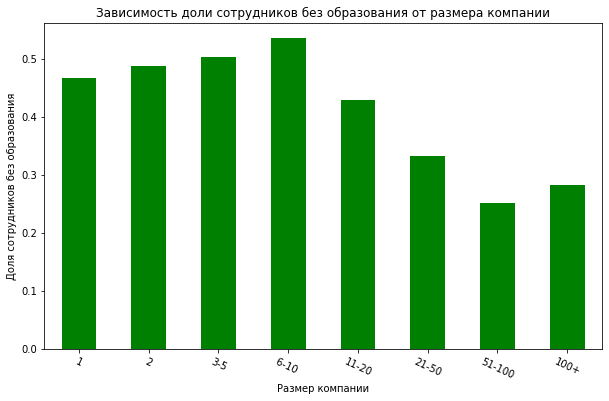

In [97]:
# построим диаграмму
shares.plot(kind='bar',
         xlabel = 'Размер компании',
         ylabel = 'Доля сотрудников без образования',
         figsize = (10,6), 
         color = 'green',
         rot = 335,
         title = 'Зависимость доли сотрудников без образования от размера компании'
        )
plt.show()

Как видим в компаниях маленького размера доля сотрудников без информации об образовании выше,чем в крупных компаниях.  

Так, среди групп компаний с численностью от 1,2, 3-5,6-10 сотрудников такой показатель  растет с 47 до 54 процентов. В более крупных компаниях данный показатель снижается до 25-28% для компаний с численостью 51-100 и 100 сотрудников соответственно.

**Доля сотрудников без информации об образовании падает с ростом численности сотрудников в компании.**

In [98]:
# строим сводную таблицу, в кототрой счиатем кол-во сотрудников с образованием 
# и кол-во всех сотрудников вообше в каждой компании 
pivotchunk2 = peopedudeg.pivot_table(
    values  =['edu_id', 'people_id'],   
    index = 'company_id', 
    aggfunc = {'edu_id':'count',
               'people_id':'count'})
display(pivotchunk2)

,edu_id,people_id
company_id,,
-1.0,49607,192094
1.0,1,2
2.0,1,1
3.0,2,3
4.0,12,13
...,...,...
285897.0,2,2
285953.0,0,1
285972.0,1,2


In [99]:
# Делим компаниии на группы по количеству сотрудников
pivotchunk2['compsize2']= pd.cut(pivotchunk2['people_id'],
    bins = [ 1,2,3,6,11,21,51,101,400],
       labels = [ '1', '2','3-5','6-10 ','11-20','21-50','51-100','100+',]
)
display(pivotchunk2)

,edu_id,people_id,compsize2
company_id,,,
-1.0,49607,192094,NaN
1.0,1,2,1
2.0,1,1,NaN
3.0,2,3,2
4.0,12,13,11-20
...,...,...,...
285897.0,2,2,1
285953.0,0,1,NaN
285972.0,1,2,1


In [100]:
# Посчитаем долю сотрудников с образованием
pivotchunk2['diplom'] = pivotchunk2['edu_id']/pivotchunk2['people_id']

In [101]:
# Посчитаем долю сотрудников без образования
pivotchunk2['nodiplom'] = 1 - ( pivotchunk2['edu_id']/pivotchunk2['people_id'])

In [102]:
display(pivotchunk2)

,edu_id,people_id,compsize2,diplom,nodiplom
company_id,,,,,
-1.0,49607,192094,NaN,0.258243,0.741757
1.0,1,2,1,0.500000,0.500000
2.0,1,1,NaN,1.000000,0.000000
3.0,2,3,2,0.666667,0.333333
4.0,12,13,11-20,0.923077,0.076923
...,...,...,...,...,...
285897.0,2,2,1,1.000000,0.000000
285953.0,0,1,NaN,0.000000,1.000000
285972.0,1,2,1,0.500000,0.500000


In [103]:

# посчитаем среднюю долю сотрудников без образования в каждой из групп 
shares2 = pivotchunk2.groupby('compsize2')['nodiplom'].agg('mean')
display(round(shares2,2))


compsize2
1         0.47
2         0.49
3-5       0.50
6-10      0.54
11-20     0.43
21-50     0.33
51-100    0.25
100+      0.28
Name: nodiplom, dtype: float64

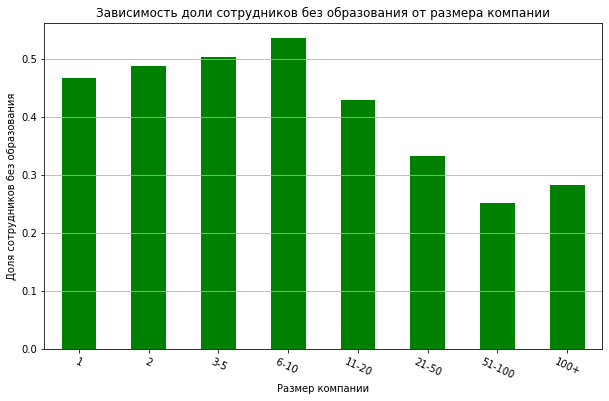

In [104]:
# построим диаграмму,  отражающую среднюю долю сотрудников без образования
shares2.plot(kind='bar',
         xlabel = 'Размер компании',
         ylabel = 'Доля сотрудников без образования',
         figsize = (10,6), 
         color = 'green',
         rot = 335,
         title = 'Зависимость доли сотрудников без образования от размера компании'
        )
plt.grid(axis = 'y')
plt.show()


Как видим в компаниях маленького размера доля сотрудников без информации об образовании выше,чем в крупных компаниях.  

Так, среди групп компаний с численностью от 1,2, 3-5,6-10 сотрудников такой показатель  растет с 47 до 54 процентов. В более крупных компаниях данный показатель снижается до 25-28% для компаний с численостью 51-100 и 100 сотрудников соответственно.

**Доля сотрудников без информации об образовании падает с ростом численности сотрудников в компании.**

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

network_username встречается в датафреймах company_and_rounds и people

In [105]:
# Информация о датафрейме company_and_rounds 
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

В датафрейме company_and_rounds 217774 записей

In [106]:
# Выведем процент пропусков в столбце network_username датафрейма company_and_rounds  
company_and_rounds['network_username'].isna().sum()/len(company_and_rounds)

0.5613158595608291

В датафрейме company_and_rounds у 56% записей пропущены значения в столбце network_username

In [107]:
# Информация о датафрейме people 
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   people_id         226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


В датафрейме people 226709 записей

In [108]:
# Выведем процент пропусков в столбце network_username датафрейма people  
people['network_username'].isna().sum()/len(people)

0.8285599601250943

В датафрейме people у 82% записей пропущены значения в столбце network_username

Как видим, в двух датафреймах пропуски в столбце network_username составляют значительную часть 

In [109]:
# Найдем пересечения датафреймов по столбцу network_username

cross =  set(people['network_username']).intersection(set(company_and_rounds['network_username'])) 

In [110]:
cross_df = pd.DataFrame(cross, columns = ['cross'])

In [111]:
# Выведем информацию о датафрейме cross_df
display(cross_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cross   2199 non-null   object
dtypes: object(1)
memory usage: 17.3+ KB


None

In [112]:
# Выведем первые строки cross_df
cross_df.head()

,cross
0,NaN
1,TorkMarketing
2,keyideas01
3,bellatouch
4,TEMAeurope


In [113]:
# найдем дубликаты в датафрейме cross_df
cross_df.duplicated().sum()

0

Дубликаты не обнаружены.

Обнаружены 2200 пересечений между двумя датасетами, дубликатов среди пересечений не обнаружено.
Количество пересечений составляет около 1% от объема датафреймов, что является крайне низким значением. Информация не пересекается об около 99% записей. Таким образом, столбец network_username не подходит для объединения датафреймов.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [114]:
# Выведем информацию о company_and_rounds
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [115]:
# Выберем столбцы, которые содержат информацию о компаниях, выделим их в отдельный датафрейм
company_cols = [
    'company_id',
    'name',
    'category_code',
    'status',
    'founded_at',
    'closed_at',
    'domain',
    'network_username',
    'country_code',
    'investment_rounds',
    'funding_rounds',
    'funding_total',
    'milestones'
]
companies = company_and_rounds[company_cols]

In [116]:
# удалим строки, где пропущены значения во всех строках и явные дубликаты
companies = companies.dropna(how='all').drop_duplicates().reset_index(drop=True)

In [117]:
companies.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
3,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
4,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0


Таким образом, из изначального датафрейма company_and_rounds выделили информацию о команиях, сохранив в отдельный датафрейм companies.  
Вероятно, раньше информация о компаниях и раундах хранилась в разных таблицах, которые были объединены. На это указывают два столбца company id из  company_and_rounds


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [118]:
# Отберем нужные данные из обработанного датасета и поместим их в отдельный датафрейм united
united = companies[((companies['funding_rounds'] > 0) | 
                   (companies['investment_rounds'] > 0)) | (companies['status'] == 'acquired') ]

In [119]:
# информация о датафрейме united
united.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

In [120]:
# первые строки united
united.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

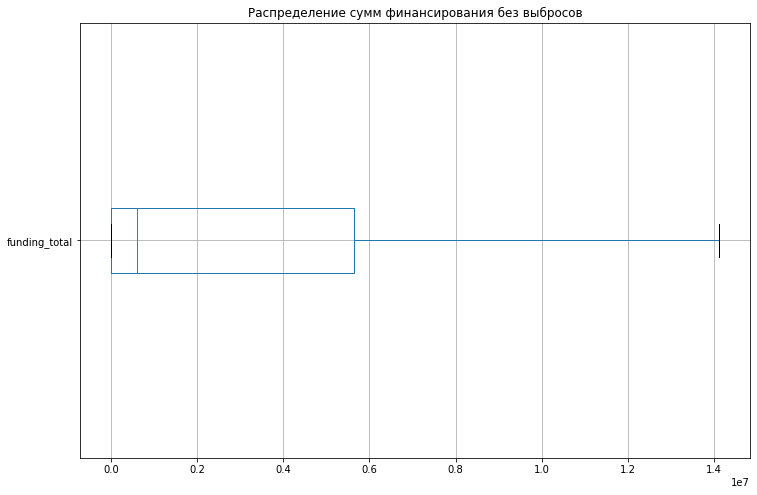

In [121]:
# Рассмотрим распределение сумм финансирования, не учитывая выбросы, то есть нетипичные значения.
moustache= united.boxplot(column = 'funding_total',
                vert = False,
                figsize = (12,8),
                showfliers = False)

moustache.set_title('Распределение сумм финансирования без выбросов')
plt.show()

Если рассматривать типичные значения без учета выбросов, то увидим, что значения объемов финансирования распределены от 0 до ~ 1,4млн. Половина значений объемов финансирования находятся в диапазоне от 0 до ~600000.

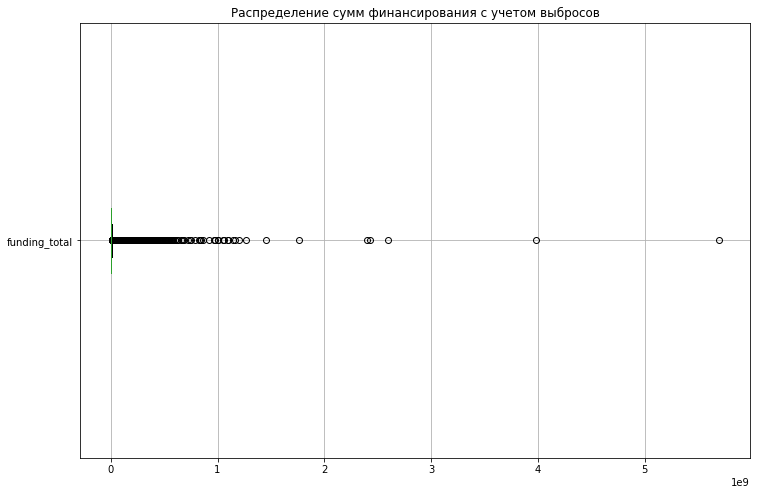

In [122]:
# Рассмотрим распределение сумм финансирования c учетом выбросов
moustache2= united.boxplot(column = 'funding_total',
                vert = False,
                figsize = (12,8)
               )

moustache2.set_title('Распределение сумм финансирования с учетом выбросов')
plt.show()

Как можем видеть, диаграмма boxplot , по сути не отражена, не показано распределение значений, наблюдаемые минимум и максимум(без аномалий), нижние и верхние квартили. Причиной этого - аномально высокие значения, которые искажают график.


In [123]:
# Рассмотрим показатели, возвращаемые методом .describe(),
pd.options.display.float_format = '{:.2f}'.format

united['funding_total'].describe()

count        40747.00
mean      10135609.64
std       56464359.98
min              0.00
25%              0.00
50%         600000.00
75%        5650650.00
max     5700000000.00
Name: funding_total, dtype: float64

В глаза бросается, что минимальное значение и первый квартиль - 0.  Среднее значение существенно больше медианы и верхнего квартиля. Такие занчения обусловлены большим размахом значений,  наличием аномально высоких значений. Для данных в таком виде неприменимы показатели, возвращаемые методом .describe(), они будут неинформативны из-за наличия аномально высоких значений.


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [124]:
# информация о датафрейме companies
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [125]:
# информация о датафрейме acquisition
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   acq_id                9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [126]:
# объединим датафремы companies и acquisition в  датафрейм purchased
purchased  = companies.merge(acquisition, how = 'left', left_on = 'company_id', right_on = 'acquired_company_id')

In [127]:
# информация о датафрейме purchased
purchased.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196696 entries, 0 to 196695
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   company_id            196696 non-null  float64       
 1   name                  196696 non-null  object        
 2   category_code         123307 non-null  object        
 3   status                196696 non-null  object        
 4   founded_at            91331 non-null   datetime64[ns]
 5   closed_at             2620 non-null    datetime64[ns]
 6   domain                126674 non-null  object        
 7   network_username      80679 non-null   object        
 8   country_code          88106 non-null   object        
 9   investment_rounds     196696 non-null  float64       
 10  funding_rounds        196696 non-null  float64       
 11  funding_total         196696 non-null  float64       
 12  milestones            196696 non-null  float64       
 13 

In [128]:
# в отдельный датафрейм lowcost выделим компании, которые были куплены за 0 или 1 доллар, при этом с ненулевым финансированием
lowcost=purchased.loc[(purchased['price_amount'] < 2) & (purchased['funding_total'] > 0)]


In [129]:
# информация о датафрейме lowcost
lowcost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 66 to 196562
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            1618 non-null   float64       
 1   name                  1618 non-null   object        
 2   category_code         1553 non-null   object        
 3   status                1618 non-null   object        
 4   founded_at            1285 non-null   datetime64[ns]
 5   closed_at             13 non-null     datetime64[ns]
 6   domain                1546 non-null   object        
 7   network_username      812 non-null    object        
 8   country_code          1536 non-null   object        
 9   investment_rounds     1618 non-null   float64       
 10  funding_rounds        1618 non-null   float64       
 11  funding_total         1618 non-null   float64       
 12  milestones            1618 non-null   float64       
 13  acq_id         

In [130]:
lowcost['funding_total'].describe()

count         1618.00
mean      18152961.94
std      144503027.47
min           3750.00
25%        2000000.00
50%        6000000.00
75%       15500000.00
max     5700000000.00
Name: funding_total, dtype: float64

Рассчитаем нижнюю и верхнюю границу выбросов для  funding_total:
q1 = 2000000
q3 = 15500000
iqr = q3 - q1 = 15500000 - 2000000 = 13500000

 - Нижний порог = Q1 – 1.5 * IQR = 2000000 - 1.5*13500000  = -18250000 - получено отрицательное значение, нижняя граница выбросов не может быть отрицательной. Можно предположить,что нижний предел выброса - минимальное значение финансирования, то есть 3750.
 - Верхний порог = Q3 + 1.5 * IQR = 15500000 + 1.5*15500000 = 38750000
 
 Нижний порог при расчете - отрицательное значение, верхний порог - 38750000 - значение, которое существенно больше медианы, среднего значения, а также большинства значений вообще. Причина подобных выбросов - наличие  аномального значения funding_total = 5700000000.  Данные значения выходят за рамки  0 и 99 процентилей

In [131]:
# Создадим отдельный датафрейм, из которого исключим аномальное значение
lowcostadequate=purchased.loc[(purchased['price_amount'] < 2) & (purchased['funding_total'] > 0)
                              & (purchased['funding_total'] < 570000000)]

In [132]:
lowcostadequate['funding_total'].describe()

count        1617.00
mean     14639141.88
std      30072399.12
min          3750.00
25%       2000000.00
50%       6000000.00
75%      15500000.00
max     395000000.00
Name: funding_total, dtype: float64

Рассчитаем нижнюю и верхнюю границу выбросов для lowcostadequate  funding_total:  

q1 = 2000000  

q3 = 15500000  

iqr = q3 - q1 = 6000000 - 2000000 = 4000000

Нижний порог = Q1 – 1.5 * IQR = 2000000 - 1.5*4000000 = -4000000 - получено отрицательное значение, нижняя граница выбросов не может быть отрицательной. Можно предположить,что нижний предел выброса - минимальное значение финансирования, то есть 3750.

Верхний порог = Q3 + 1.5 * IQR = 15500000 + 1.5*4000000 = 21500000

Таким образом, после исключения аномального значения, пересчитали нижнюю и верхнюю границы выбросов: 3750 и 21500000 соответственно

In [133]:
# рассчитаем 25 процентиль
q1 = lowcostadequate['funding_total'].quantile(0.25)
display(q1)

2000000.0

In [134]:
# рассчитаем 75 процентиль
q3 = lowcostadequate['funding_total'].quantile(0.75)
display(q3)

15500000.0

In [135]:
# рассчитаем межквартильный размах
iqr = q3-q1
display(iqr)

13500000.0

In [136]:
# рассчитаем нижнюю границу межквартильного размаха. При получении отрицательного значения, оно будет замененно на 0.
lower_bound = max(0, q1 - 1.5 * iqr)
display(lower_bound)

0

In [137]:
# рассчитаем верхнюю границу межквартильного размаха.
upper_bond = q3 + 1.5*iqr
display(upper_bond)

35750000.0

Таким образом, после исключения аномального значения, пересчитали нижнюю и верхнюю границы выбросов: 0 и 35750000 соответственно


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [138]:
purchased.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196696 entries, 0 to 196695
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   company_id            196696 non-null  float64       
 1   name                  196696 non-null  object        
 2   category_code         123307 non-null  object        
 3   status                196696 non-null  object        
 4   founded_at            91331 non-null   datetime64[ns]
 5   closed_at             2620 non-null    datetime64[ns]
 6   domain                126674 non-null  object        
 7   network_username      80679 non-null   object        
 8   country_code          88106 non-null   object        
 9   investment_rounds     196696 non-null  float64       
 10  funding_rounds        196696 non-null  float64       
 11  funding_total         196696 non-null  float64       
 12  milestones            196696 non-null  float64       
 13 

In [139]:
#заменим на 0 пропуски в ценах  приобретения компаний price_amount
purchased['price_amount'] = purchased['price_amount'].fillna(0)

In [140]:
purchased['price_amount'].sort_values(ascending = False).head(20)

101705   2600000000000.00
156666     39000000000.00
159814     35000000000.00
145133     28100000000.00
75734      26000000000.00
178486     20000000000.00
111984     18400000000.00
101704     13900000000.00
176167     12500000000.00
146301     10500000000.00
105859     10200000000.00
85737      10100000000.00
88129      10000000000.00
15633       9400000000.00
4646        9300000000.00
172538      8700000000.00
144028      8689310000.00
83027       8600000000.00
125974      8500000000.00
143843      8500000000.00
Name: price_amount, dtype: float64

Найдем максимальные значения для цены стартапов в каждой категории. Предварительно стоит очистить датафрейм от выбросов - стартапов с аномально высокой ценой продажи. Выбросом предлагаю считать стоимость 10 млрд и выше.

In [141]:
# выделим часть таблицы без выбросов в отдельный датафрейм  purchasedclean
purchasedclean = purchased.loc[(purchased)['price_amount'] < 10000000000]

In [142]:
# Для нахождения категорий стартапов с максимальными ценами 
# найдем максимальные цены продажи стартапов в зависимости от категории
maxprice = purchasedclean.groupby('category_code')['price_amount'].max().sort_values()
display(maxprice)

category_code
pets                        0.00
legal                       0.00
design                      0.00
government                  0.00
nonprofit                   0.00
local                16140200.00
social              151000000.00
messaging           169000000.00
travel              198000000.00
analytics           263000000.00
fashion             270000000.00
music               280000000.00
news                315000000.00
medical             325000000.00
nanotech            584000000.00
education           721000000.00
sports              985000000.00
photo_video        1010470000.00
transportation     1100000000.00
search             1200000000.00
ecommerce          1250000000.00
hospitality        2170000000.00
network_hosting    3000000000.00
advertising        3100000000.00
public_relations   3400000000.00
cleantech          3750000000.00
other              3900000000.00
manufacturing      4050000000.00
finance            4400000000.00
hardware           4600000000

Максимальная цена стартапов в категориях: 
- mobile            
- consulting         
- web                
- semiconductor      
- real_estate        
- enterprise         
- games_video       
- security 
- biotech       
- software

Было решено отобрать категории стартапов , максимальная стоимость которых превышала 5.5 млрд

In [143]:
# Для нахождения категорий стартапов с  максимальным разбросом цен за стартап
# найдем стандартное отклонение цены продажи стартапа в для каждой категории 
deviation =  purchasedclean.groupby('category_code')['price_amount'].std().sort_values()
display(deviation)

category_code
legal                      0.00
design                     0.00
nonprofit                  0.00
government                 0.00
pets                       0.00
local                 576068.44
social               4606732.80
travel               7565765.34
analytics           10620696.67
music               11617760.82
messaging           12825112.33
medical             13063358.12
education           13417511.89
news                14199626.69
fashion             14604467.80
ecommerce           27337294.96
search              36055391.90
sports              39196845.29
photo_video         43499077.34
transportation      50804450.85
other               52390978.77
advertising         65218305.67
nanotech            69801350.79
hospitality         81505048.35
consulting          83458140.39
mobile              93604435.62
web                 97773285.32
hardware           113448381.90
public_relations   114264360.60
games_video        117371420.47
network_hosting    1264704

Максимальный разброс цены покупки стартапа наблюдается в следующих категориях: 

- health
- software
- enterprise
- manufacturing
- security
- real_estate
- automotive
- semiconductor
- biotech

Было решено отобрать категории стартапов, отклонение стоимости покупки в которых  превышало 150 млн.

Высокий разброс цен может объясняться наличием стартапов  с очень высокой и очень низкой ценой продажи. Причиной высокой цены стартапа может являться выполенение и перевыполнение обязательств/целей/показателей, утвержденных при получениии финансирования

Часть из списка данных категорий взодят также в список категорий с наиболее высокой  ценой продажи:
semiconductor,real_estate,enterprise, security, biotech, software


In [144]:
# Отобразим максимальные цены продажи стартапов в зависимости от категории
display(maxprice)

category_code
pets                        0.00
legal                       0.00
design                      0.00
government                  0.00
nonprofit                   0.00
local                16140200.00
social              151000000.00
messaging           169000000.00
travel              198000000.00
analytics           263000000.00
fashion             270000000.00
music               280000000.00
news                315000000.00
medical             325000000.00
nanotech            584000000.00
education           721000000.00
sports              985000000.00
photo_video        1010470000.00
transportation     1100000000.00
search             1200000000.00
ecommerce          1250000000.00
hospitality        2170000000.00
network_hosting    3000000000.00
advertising        3100000000.00
public_relations   3400000000.00
cleantech          3750000000.00
other              3900000000.00
manufacturing      4050000000.00
finance            4400000000.00
hardware           4600000000

In [145]:
# Найдем средние цены продажи стартапов в зависимости от категории
meanprice = purchased.groupby('category_code')['price_amount'].mean().sort_values()

In [146]:
# Выведем средние цены продажи стартапов в зависимости от категории,
# отсортируем в порядке возрастания средней цены стартапа
display(meanprice)

category_code
legal                      0.00
design                     0.00
nonprofit                  0.00
government                 0.00
pets                       0.00
local                  20560.76
social                192748.09
education             275729.06
travel                347222.22
music                 492013.77
analytics             530791.79
medical               586730.27
fashion               999111.90
news                 1063719.12
messaging            1306397.31
ecommerce            1330667.77
search               1750091.58
sports               1844444.44
consulting           1876495.61
photo_video          2200312.50
transportation       2760736.20
other                3260191.98
advertising          3572856.67
hospitality          4013541.67
web                  4749336.73
games_video          5210799.50
mobile               6012156.67
health               6272379.27
hardware             7394342.04
nanotech             8342857.14
finance              87214

Как видим, наибольшая средняя цена продажи в категориях:
- network_hosting
- security
- real_estate
- manufacturing
- automotive
- biotech
- semiconductor
- public_relations
- enterprise


Было решено отобрать те категории стартапов, средняя цена продажи которых превышала 1 млн.


In [147]:
# рассчитаем минимальное значением продажи стартапа в каждой категории 
minprice = purchased.groupby('category_code')['price_amount'].min().sort_values()

In [148]:
# рассчитаем разницу между максимальным и минимальным значением продажи стартапа в каждой категории 
amp = maxprice - minprice

In [149]:
# выведем разницу между максимальным и минимальным значением продажи стартапа в каждой категории 
display(amp.sort_values())

category_code
pets                        0.00
legal                       0.00
design                      0.00
government                  0.00
nonprofit                   0.00
local                16140200.00
social              151000000.00
messaging           169000000.00
travel              198000000.00
analytics           263000000.00
fashion             270000000.00
music               280000000.00
news                315000000.00
medical             325000000.00
nanotech            584000000.00
education           721000000.00
sports              985000000.00
photo_video        1010470000.00
transportation     1100000000.00
search             1200000000.00
ecommerce          1250000000.00
hospitality        2170000000.00
network_hosting    3000000000.00
advertising        3100000000.00
public_relations   3400000000.00
cleantech          3750000000.00
other              3900000000.00
manufacturing      4050000000.00
finance            4400000000.00
hardware           4600000000

Наибольший разброс цен за стартап рассчитывался как разница между максимальным и минимальным значением цены стартапа в данной категории. Топ - 9 категорий стартапов по разбросу цены: 

- real_estate           
- security            
- games_video          
- software            
- mobile              
- other                
- biotech             
- public_relations    
- enterprise

Высокий разброс цен может объясняться наличием стартапов, с очень высокой и очень низкой ценой продажи. Причиной высокой цены стартапа может являться выполенение и перевыполнение обязательств/целей/показателей, утвержденных при получениии финансирования 

Часть из списка данных категорий взодят также в список категорий с наиболее высокой средней ценой продажи:  
public_relation, enterprise, security, real_estate, biotech



### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [150]:
# Рассмотрим типичное количество раундов для каждого возможного статуса стартапа.
purchased.groupby('status')['funding_rounds'].median()

status
acquired    0.00
closed      1.00
ipo         0.00
operating   0.00
Name: funding_rounds, dtype: float64

Как видим, медианное количество раундов финансирования для компаний в статусах acquired, ipo, operating - 0 - то есть половина  компаний в этих статусах не получили финансирования. При этом медианное значение для компаний в статусе closed - 1. То есть половина компаний были закрыты после  1 раунда финансирования.

In [151]:
# Рассмотрим среднее количество раундов финансирования для каждой категории стартапов.
roundsmean = purchased.groupby('category_code')['funding_rounds'].mean().sort_values()

In [152]:
display(roundsmean)

category_code
other              0.06
local              0.06
consulting         0.09
legal              0.10
public_relations   0.18
search             0.24
sports             0.27
ecommerce          0.28
government         0.28
education          0.28
games_video        0.29
web                0.29
design             0.30
transportation     0.34
network_hosting    0.38
advertising        0.38
travel             0.39
software           0.42
photo_video        0.44
real_estate        0.47
news               0.48
mobile             0.53
hospitality        0.54
health             0.55
automotive         0.56
music              0.58
hardware           0.59
pets               0.62
security           0.64
fashion            0.66
finance            0.66
enterprise         0.73
social             0.74
manufacturing      0.81
nonprofit          0.82
cleantech          1.01
medical            1.23
semiconductor      1.35
biotech            1.35
analytics          1.35
messaging          1.37
na

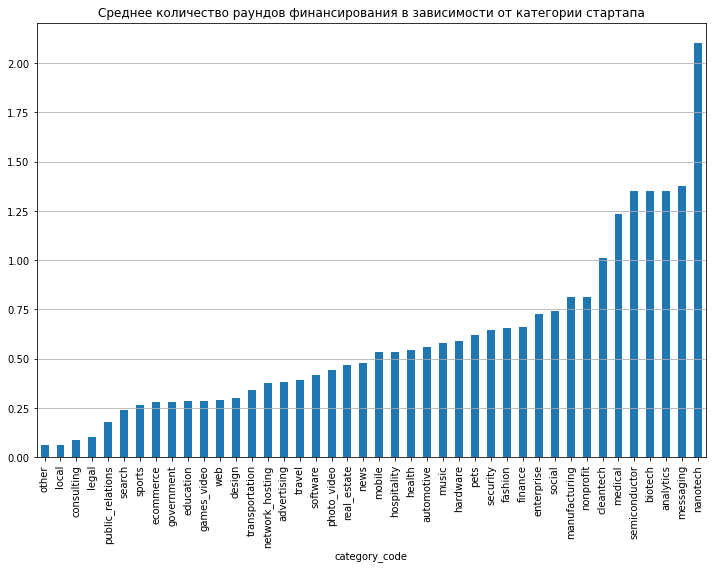

In [153]:
# Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы
roundsmean.plot(kind = 'bar',
               figsize = (12,8),
                y= 'Среднее количество раундов',
               x = 'Категория',
               title = 'Среднее количество раундов финансирования в зависимости от категории стартапа')
plt.grid(axis = 'y')

plt.show()

Можем видеть, что среднее количество раундов финансирования больше 1 наблюдается у 7 категорий стартапов : 
- cleantech         
- medical           
- semiconductor     
- biotech            
- analytics          
- messaging          
- nanotech

Значительно выделяется категория nanotech - единственная категория,в которой у стартапа в среднем больше 2 раундов финансирования.

Можно сказать, что данные категории стартапов более привлекательны для инвесторов, тк способны функционировать дольше в сравнении с категориями стартапов, имеющими более низкое среднее кол-во раундов финансирования.
Чем меньше среднее кол-во раундов финансирования, тем большая часть стартапов не получили финансирования.

In [154]:
# первые строки датафрейма united
united.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00
1,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
2,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00
13,1001.00,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.00,1.00,5000000.00,3.00
18,10014.00,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.00,1.00,0.00,4.00


In [155]:
# Рассмотрим типичное количество раундов для каждого возможного статуса стартапа.
united.groupby('status')['funding_rounds'].median()

status
acquired    0.00
closed      1.00
ipo         1.00
operating   1.00
Name: funding_rounds, dtype: float64

Как видим, медианное количество раундов финансирования для приобретенных компаний - 0. То есть  половина компаний с таким статусом были приобретены, не получив ни одного раунда финансирования.

Типичное количество раундов финансирования для компаний в статуса closed, ipo, operation - 1. То есть, половина компаний были закрыты, вышли на ipo или продолжают функционировать, проведя 1 раунд финансирования.

In [156]:
# Рассчитаем среднее количество раундов финансирования для компаний в разных статусах.
meanrounds = united.groupby('status')['funding_rounds'].mean().sort_values()

In [157]:
# Отобразим среднее количество раундов финансирования для компаний в разных статусах.
display(meanrounds)

status
acquired    0.52
closed      1.38
operating   1.52
ipo         1.93
Name: funding_rounds, dtype: float64

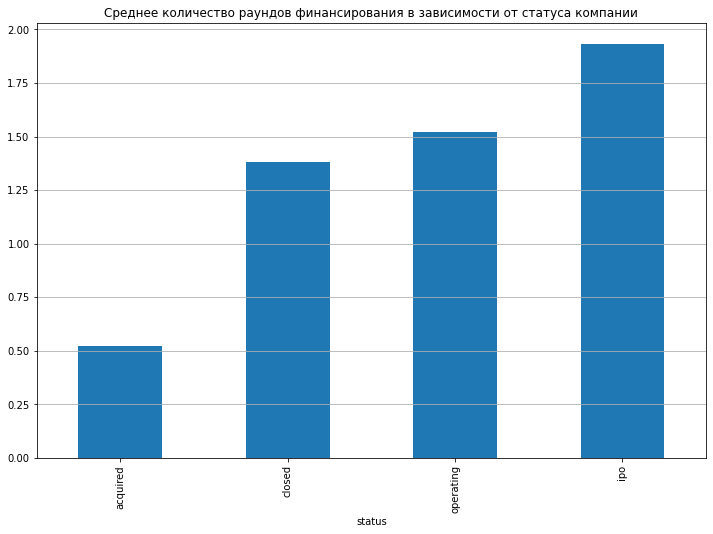

In [158]:
# Построим график, который отображает, сколько в среднем раундов финансирования проходили стартапы
meanrounds.plot(kind = 'bar',
               figsize = (12,8),
                y= 'Среднее количество раундов',
               x = 'Категория',
               title = 'Среднее количество раундов финансирования в зависимости от статуса компании')
plt.grid(axis = 'y')

plt.show()

Меньше всего раундов финансирования у приобретенных компаний(статус acquired) - 0.5. Часть компаний были сразу куплены, без финансирования. У закрытых компаний  в среднем 1.38 раундов финансирования.

Среднее количество раундов финансирования растет у действующих компаний и компаний, вышедших на ipo. То есть компании, продолжающие деятельность, в среднем прошли больше раундов финансирования(1.52),чем закрытые.  Больше всего  раундов финансирования прошли компании, вышедшие на ipo - 1.93.  


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

### Знакомство с данными

Финансовая компания, которая предоставляет льготные займы стартапам,
хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов.

Получены данные от заказчика - таблицы с информацией о компаниях, покупках компаний другими компаниями, о сотрудниках компаний и их образовании.  


Была проведена первичная обработка данных – проверили и при необходимости изменили названия столбцов в таблицах, чтобы избежать их дублирования.

### Предобработка данных, предварительное исследование

#### Раунды финансирования по годам

Проанализированы типичный размер средств, выделяемый в рамках одного раунда, и  общее количество раундов финансирования за год, для годов, в которых известно о 50 и более раундах финансирования.Таким образом, рассматривается период 1999 – 2013 годов.

Максимальный типичный размер собранных средств в рамках раунда финансирования зафиксирован в 2005 году - 5,5 млн.

С 2005 по 2012 год наблюдалось снижение объемов финансирования стартапов, в 2012 году достигнуто наименьшее значение объема финансирования 1 млн. 2013 год стал моментом изменения тренда - в 2013 объем финансирования превысил значение 2012 года. 

Также очевиден тренд роста количества раундов финансирования от года к году. Единственное исключение - 2001 год, в котором было меньше раундов, чем в предыдущем 2000 году.

Проанализированы типичный размер средств, выделяемый в рамках одного раунда, и общее количество раундов финансирования за год, для годов, в которых известно о 50 и более раундах финансирования.Таким образом, рассматривается период 1999 – 2013 годов.

Максимальный типичный размер собранных средств в рамках раунда финансирования зафиксирован в 2005 году - 5,5 млн. С 2005 по 2012 год наблюдалось снижение объемов финансирования стартапов, в 2012 году достигнуто наименьшее значение объема финансирования 1 млн. 2013 год стал моментом изменения тренда - в 2013 объем финансирования превысил значение 2012 года. Также очевиден тренд роста количества раундов финансирования от года к году. Единственное исключение - 2001 год, в котором было меньше раундов, чем в предыдущем 2000 году.

Можно сказать, что наблюдаем 2 разнонаправленных тренда: рост числа раундов финансирования в рамках года и снижение объемов финансирования.
Вероятно, падает уверенность и оптимизм инвесторов, поэтому они готовы рисковать меньшими объемами средств, чем ранее. То есть растет количество раундов финансирования, но объем средств, выделяемых в рамках раунда, снижается

#### Люди и их образование

Оценили зависимость полноты информации  об образовании сотрудников от размера компании.

Выяснили, что в компаниях маленького размера доля сотрудников без информации об образовании выше, чем в крупных компаниях.

Так, среди групп компаний с численностью от 1,2, 3-5,6-10 сотрудников такой показатель растет с 47 до 54 процентов. В более крупных компаниях данный показатель снижается до 25-28% для компаний с численностью 51-100 и 100 сотрудников соответственно.

*Доля сотрудников без информации об образовании падает с ростом численности сотрудников в компании.*


#### Объединять или не объединять

Ответили на вопрос заказчика, подходит ли столбец  network_username для объединения датафреймов. 

Обнаружены 2200 пересечений между двумя датасетами, дубликатов среди пересечений не обнаружено.

Количество пересечений составляет около 1% от объема датафреймов, что является крайне низким значением. Информация не пересекается об около 99% записей. Таким образом, столбец network_username не подходит для объединения датафреймов.


#### Проблемный датасет

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету company_and_rounds.csv

Выдвинули гипотезу,что, вероятно, company_and_rounds образован из ранее отдельных таблиц. Из изначального датафрейма company_and_rounds выделили информацию о команиях, сохранив в отдельный датафрейм companies.


### Исследовательский анализ объединённых таблиц

#### Объединение данных

В части исследовательского анализа данных выделили данные, соответствующие условию заказчика, в отдельный датафрейм: те компании, у которых указаны значения funding_rounds или investment_rounds больше нуля, и те, у которых в колонке status указано acquired , были помещены в датафрейм united.

#### Анализ выбросов

Проанализировали  обычный для рассматриваемого периода размер средств, который предоставлялся компаниям. 

Если рассматривать типичные значения без учета выбросов, то увидим, что значения объемов финансирования распределены от 0 до ~ 1,4млн. 50% значений объемов финансирования находятся в диапазоне от 0 до 600000.
Показатели, рассчитываемые методом describe()  в данном случае могут быть неинформативны, тк искажены наличием аномально высоких значений. 


#### Куплены забесплатно?

Исключив аномальные значения, рассчитали нижнюю и верхнюю границы выбросов стоимости приобретения стартапов: 3750 и 21500000 соответственно

Таким образом, после исключения аномального значения, пересчитали нижнюю и верхнюю границы выбросов: 0 и 35750000 соответственно

#### Цены стартапов по категориям

Проанализировали цены стартапов в разрезе категорий: 
наибольшая средняя цена продажи в категориях:
-	network_hosting
-	security
-	real_estate
-	manufacturing
-	automotive
-	biotech
-	semiconductor
-	public_relations
-	enterprise

Было решено отобрать те категории стартапов, средняя цена продажи которых превышала 1 млн.

Наибольший разброс цен за стартап рассчитывался как разница между максимальным и минимальным значением цены стартапа в данной категории. Топ - 9 категорий стартапов по разбросу цены:
-	real_estate
-	security
-	games_video
-	software
-	mobile
-	other
-   biotech
-   public_relations
-	enterprise


Максимальный разброс цены покупки стартапа наблюдается в следующих категориях: 

- health
- software
- enterprise
- manufacturing
- security
- real_estate
- automotive
- semiconductor
- biotech

Было решено отобрать категории стартапов, отклонение стоимости покупки в которых  превышало 150 млн.

Максимальная цена стартапов в категориях: 
- mobile            
- consulting         
- web                
- semiconductor      
- real_estate        
- enterprise         
- games_video       
- security 
- biotech       
- software

Было решено отобрать категории стартапов , максимальная стоимость которых превышала 5.5 млрд

Высокий разброс цен может объясняться наличием стартапов с очень высокой и очень низкой ценой продажи. Причиной высокой цены стартапа может являться выполенение и перевыполнение обязательств/целей/показателей, утвержденных при получениии финансирования

Часть из списка данных категорий взодят также в список категорий с наиболее высокой ценой продажи: semiconductor,real_estate,enterprise, security, biotech, software

#### Сколько раундов продержится стартап перед покупкой

Проанализировали типичное количество раундов финансирования для стартапов. Медианное количество раундов финансирования для компаний в статусах *acquired, ipo, operating* - 0 - то есть половина  компаний в этих статусах не получили финансирования. 

При этом медианное значение для компаний в статусе closed - 1. То есть половина компаний были закрыты после  1 раунда финансирования.


Рассчитали среднее значение раундов финансирования для стартапов в разрезе категорий. 

Можем видеть, что среднее количество раундов финансирования больше 1 наблюдается у 7 категорий стартапов:
-	cleantech
-	medical
-	semiconductor
-	biotech
-	analytics
-	messaging
-	nanotech


Значительно выделяется категория nanotech - единственная категория,в которой у стартапа в среднем больше 2 раундов финансирования.
Можно сказать, что данные категории стартапов более привлекательны для инвесторов, тк способны функционировать дольше в сравнении с категориями стартапов, имеющими более низкое среднее кол-во раундов финансирования. Чем меньше среднее кол-во раундов финансирования, тем большая часть стартапов не получили финансирования.


Предоставленный для анализа датафрейм содержит значительное количество пропусков, данные хранятся неоптимальным образом, желательно было бы изменить структуру храниения данных для облегчения анализа, возможно, исключить из данных аномальные значения, которые также затрудняют анализ. Выводы. полученные в процессе работы, ответы на вопросы заказчика не позволяют дать однозначные рекомендации. 

Как видим, медианное количество раундов финансирования для приобретенных (acquired) компаний - 0. То есть  половина компаний с таким статусом были приобретены, не получив ни одного раунда финансирования.

Типичное количество раундов финансирования для компаний в статуса closed, ipo, operation - 1. То есть, половина компаний были закрыты, вышли на ipo или продолжают функционировать, проведя 1 раунд финансирования.



Меньше всего раундов финансирования в среднем у приобретенных компаний(статус acquired) - 0.5. Часть компаний были сразу куплены, без финансирования. У закрытых компаний в среднем 1.38 раундов финансирования.

Среднее количество раундов финансирования растет у действующих компаний и компаний, вышедших на ipo. То есть компании, продолжающие деятельность, в среднем прошли больше раундов финансирования(1.52),чем закрытые. Больше всего раундов финансирования прошли компании, вышедшие на ipo - 1.93.